In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Read the dataset 
df=pd.read_csv(r"C:\Users\mukeshkr\Desktop\XYZ\Machine Learning\02-Linear Regression\height-weight.csv")

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


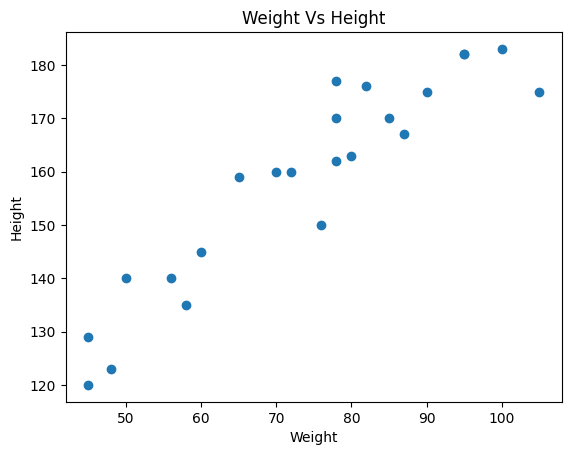

In [5]:
## Visualizating the data 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight Vs Height")
plt.show()

1. Dataset
2. Divide the dataset into dependent and independent feature
3. Train test Split:- Required to train the model and test the model 
4. Standardize the data

In [6]:
## Divide the dataset 
X=df[['Weight']] ## Independent feature 
y=df['Height'] ## Dependent feature 

In [10]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(18, 1)
(5, 1)
(18,)
(5,)


In [11]:
## Standard Scaler the independent feature 
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)
print(f"Transformed X-Trained Data:- \n {X_train}")
print(f"Transformed X-Test Data:- \n {X_test}")


Transformed X-Trained Data:- 
 [[ 1.73689094]
 [-0.92026952]
 [ 1.4542143 ]
 [ 0.21043706]
 [-1.48562281]
 [ 1.17153765]
 [-1.6552288 ]
 [-0.80719886]
 [-0.24184557]
 [ 0.0973664 ]
 [-1.37255215]
 [-1.03334018]
 [-0.12877492]
 [ 0.88886101]
 [ 0.43657837]
 [ 0.60618436]
 [ 0.71925502]
 [ 0.32350772]]
Transformed X-Test Data:- 
 [[ 0.21043706]
 [ 0.21043706]
 [-1.6552288 ]
 [ 1.17153765]
 [-0.52452222]]


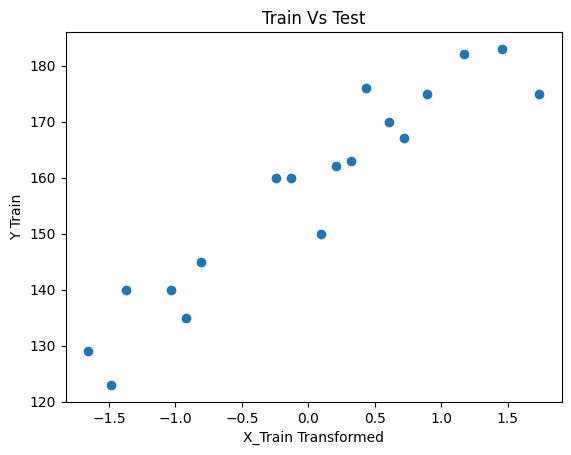

In [13]:
## Visualizating the transformed data 
plt.scatter(X_train,y_train)
plt.xlabel("X_Train Transformed")
plt.ylabel("Y Train")
plt.title("Train Vs Test")
plt.show() 

In [15]:
### Train the model
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
print(f"Predicted Result:-  \n {y_pred}")

Predicted Result:-  
 [161.08467086 161.08467086 129.3041561  177.45645118 148.56507414]


In [16]:
## Checking the slope and intercept
print(f"Slope or coefficient of weights is:-  {regression.coef_}")
print(f"Intercept is:-  {regression.intercept_}")

Slope or coefficient of weights is:-  [17.03440872]
Intercept is:-  157.5


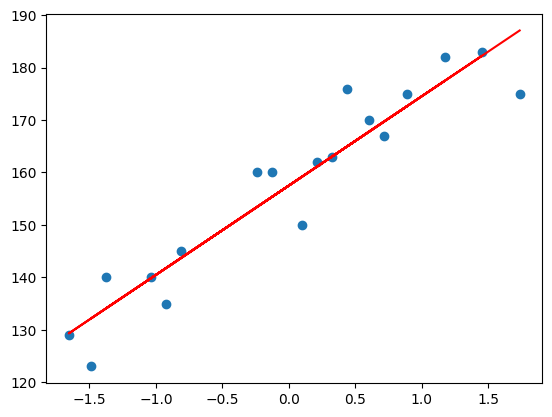

In [19]:
### Let's create a best fit line 
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),'r')

### Prediction of train data 

1. prediction height output=intercept+coef_(weights)

### Prediction of test data 

1. prediction height output=intercept+coef(weights)

In [20]:
## Performace metrics 

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error:-",mse)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:-",mae)
rmse=np.sqrt(mse)
print("Root Mean Square:-", rmse)

Mean Squared Error:- 109.77592599051664
Mean Absolute Error:- 9.822657814519232
Root Mean Square:- 10.477400726827081


In [25]:
## Model accuracy
r2score=r2_score(y_test,y_pred)
print("R2 Score: ",r2score)
adjr2= 1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score is :- ",adjr2)

R2 Score:  0.776986986042344
Adjusted R2 score is :-  0.7026493147231252


In [31]:
## new datapoint 
data=80
scale_weight=scalar.transform([[data]])
print(scale_weight)
predicted = regression.predict(scale_weight)

[[0.32350772]]


C:\Users\mukeshkr\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
print("The height of the person whose weight is 80KG is:-",predicted[0].round(2))

The height of the person whose weight is 80KG is:- 163.01
